# Random Forest Model

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

## Import processed dataframe

In [32]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/diabetes.csv")

## Train / Test Split

In [33]:
# Define X (features) and y (target)
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating model and training data

In [34]:
model = RandomForestClassifier(random_state=18)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Visualization

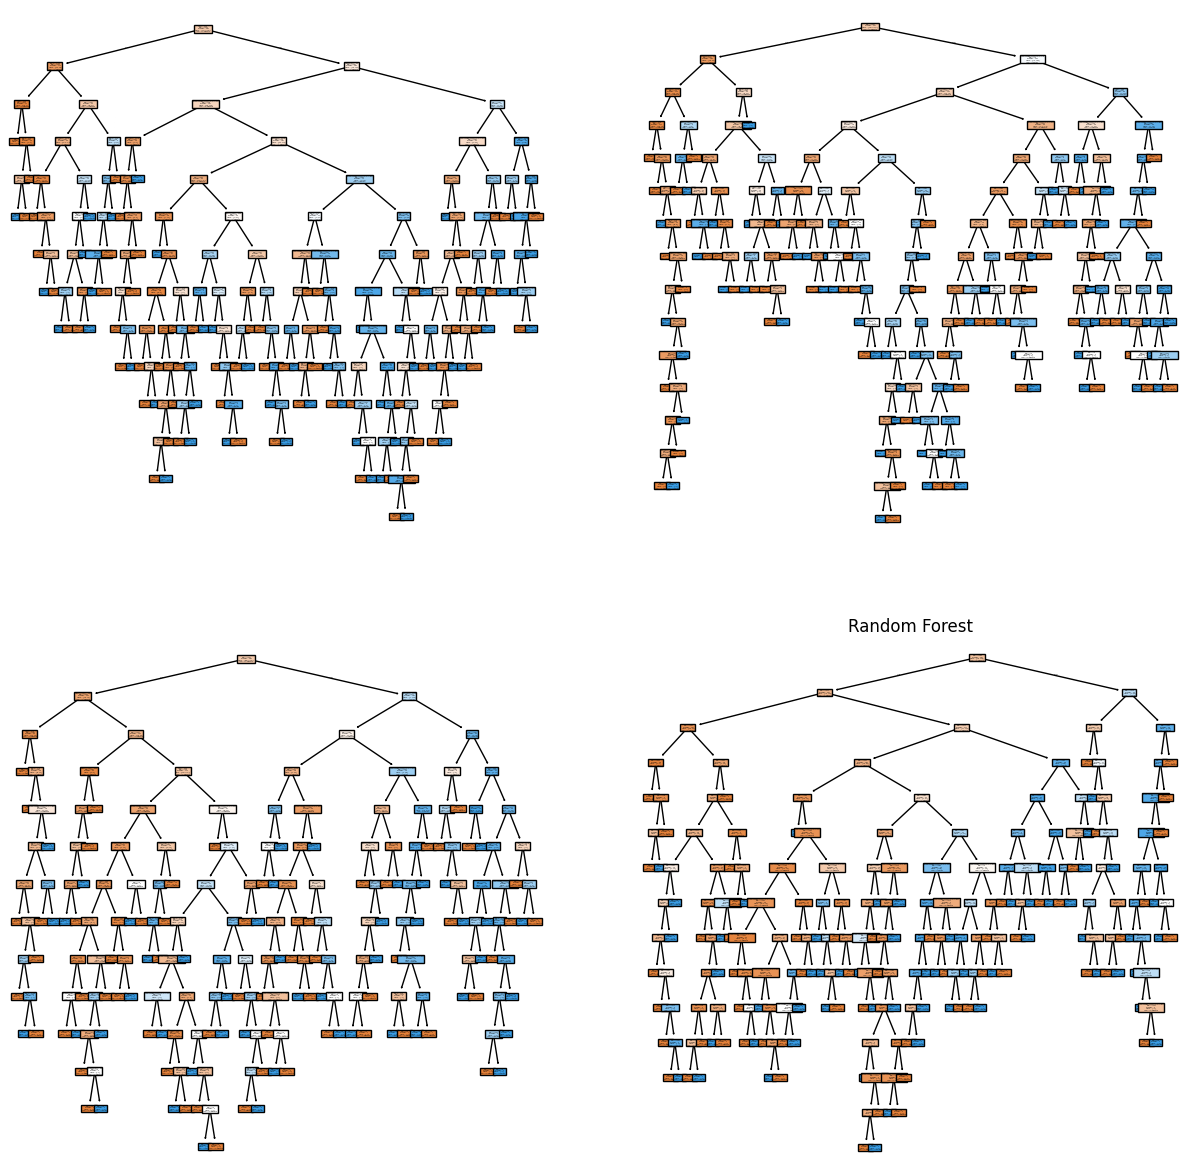

In [45]:
# Showing first 4 trees
fig, axis = plt.subplots(2, 2, figsize=(15, 15))
class_names = ["No diabetes", "Diabetes"]
tree.plot_tree(model.estimators_[0], ax=axis[0, 0], feature_names=list(X_train.columns), class_names=class_names, filled=True)
tree.plot_tree(model.estimators_[1], ax=axis[0, 1], feature_names=list(X_train.columns), class_names=class_names, filled=True)
tree.plot_tree(model.estimators_[2], ax=axis[1, 0], feature_names=list(X_train.columns), class_names=class_names, filled=True)
tree.plot_tree(model.estimators_[3], ax=axis[1, 1], feature_names=list(X_train.columns), class_names=class_names, filled=True)

plt.title("Random Forest")
plt.show()

## Predictions

In [36]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [37]:
# Evaluate accuracy
model_accuracy = accuracy_score(y_test, y_pred_test)
model_accuracy

0.7467532467532467

### Observations
The decision tree model achieved 74,67% accuracy on the test set.

## Optimization

In [57]:
# Hyperparameters to test
hyperparameters = {"n_estimators": [10, 100, 200],
                "max_depth": [1, 3, 10, 20, None],
                "min_samples_split": [1, 2, 5, 10],
                "min_samples_leaf": [1, 2, 4],
                "max_features": ["sqrt", "log2", None]}

# Initialize the grid search
grid_search = GridSearchCV(model, hyperparameters, scoring="accuracy", cv=5, n_jobs=-1)
grid_search

,estimator,RandomForestC...ndom_state=18)
,param_grid,"{'max_depth': [1, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [58]:
# Training Grid Search
grid_search.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
675 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
675 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

,estimator,RandomForestC...ndom_state=18)
,param_grid,"{'max_depth': [1, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [59]:
# Looking for best parameters
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
# Evaluate optimized model on the test set
grid_model = grid_search.best_estimator_
test_accuracy = grid_model.score(X_test, y_test)
test_accuracy

0.7662337662337663

### Observations
Our optimized Random Forest model achieves an accuracy of 76.62%, an improvement over the previous 74.67%. Hyperparameter tuning helped us obtain better parameters, resulting in higher effectiveness. Meanwhile, the optimized Decision Tree model reached an accuracy of 75.97%. These results indicate that the Random Forest model provides higher accuracy than the Decision Tree.

## Saving model

In [61]:
with open("/workspaces/josefina-aispuro-merelles-machine-learning/models/random_forest_optimized_model.pkl", "wb") as file:
    pickle.dump(grid_model, file)